# Find the minimum weight cut 

A cut, set of edges that separates the endpoints of e and has minimum weight.

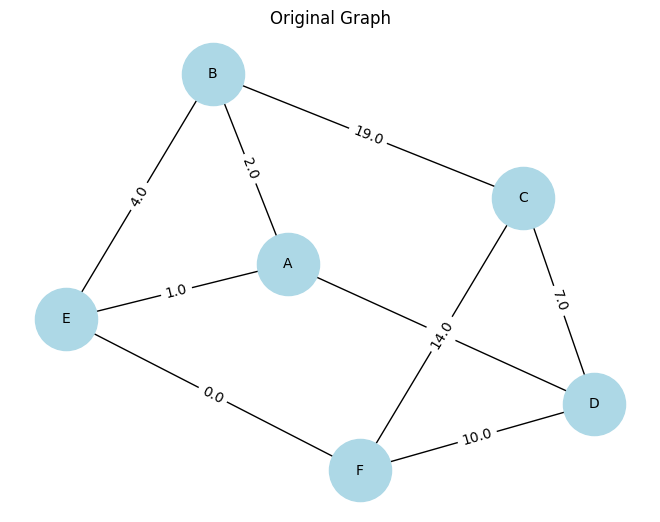

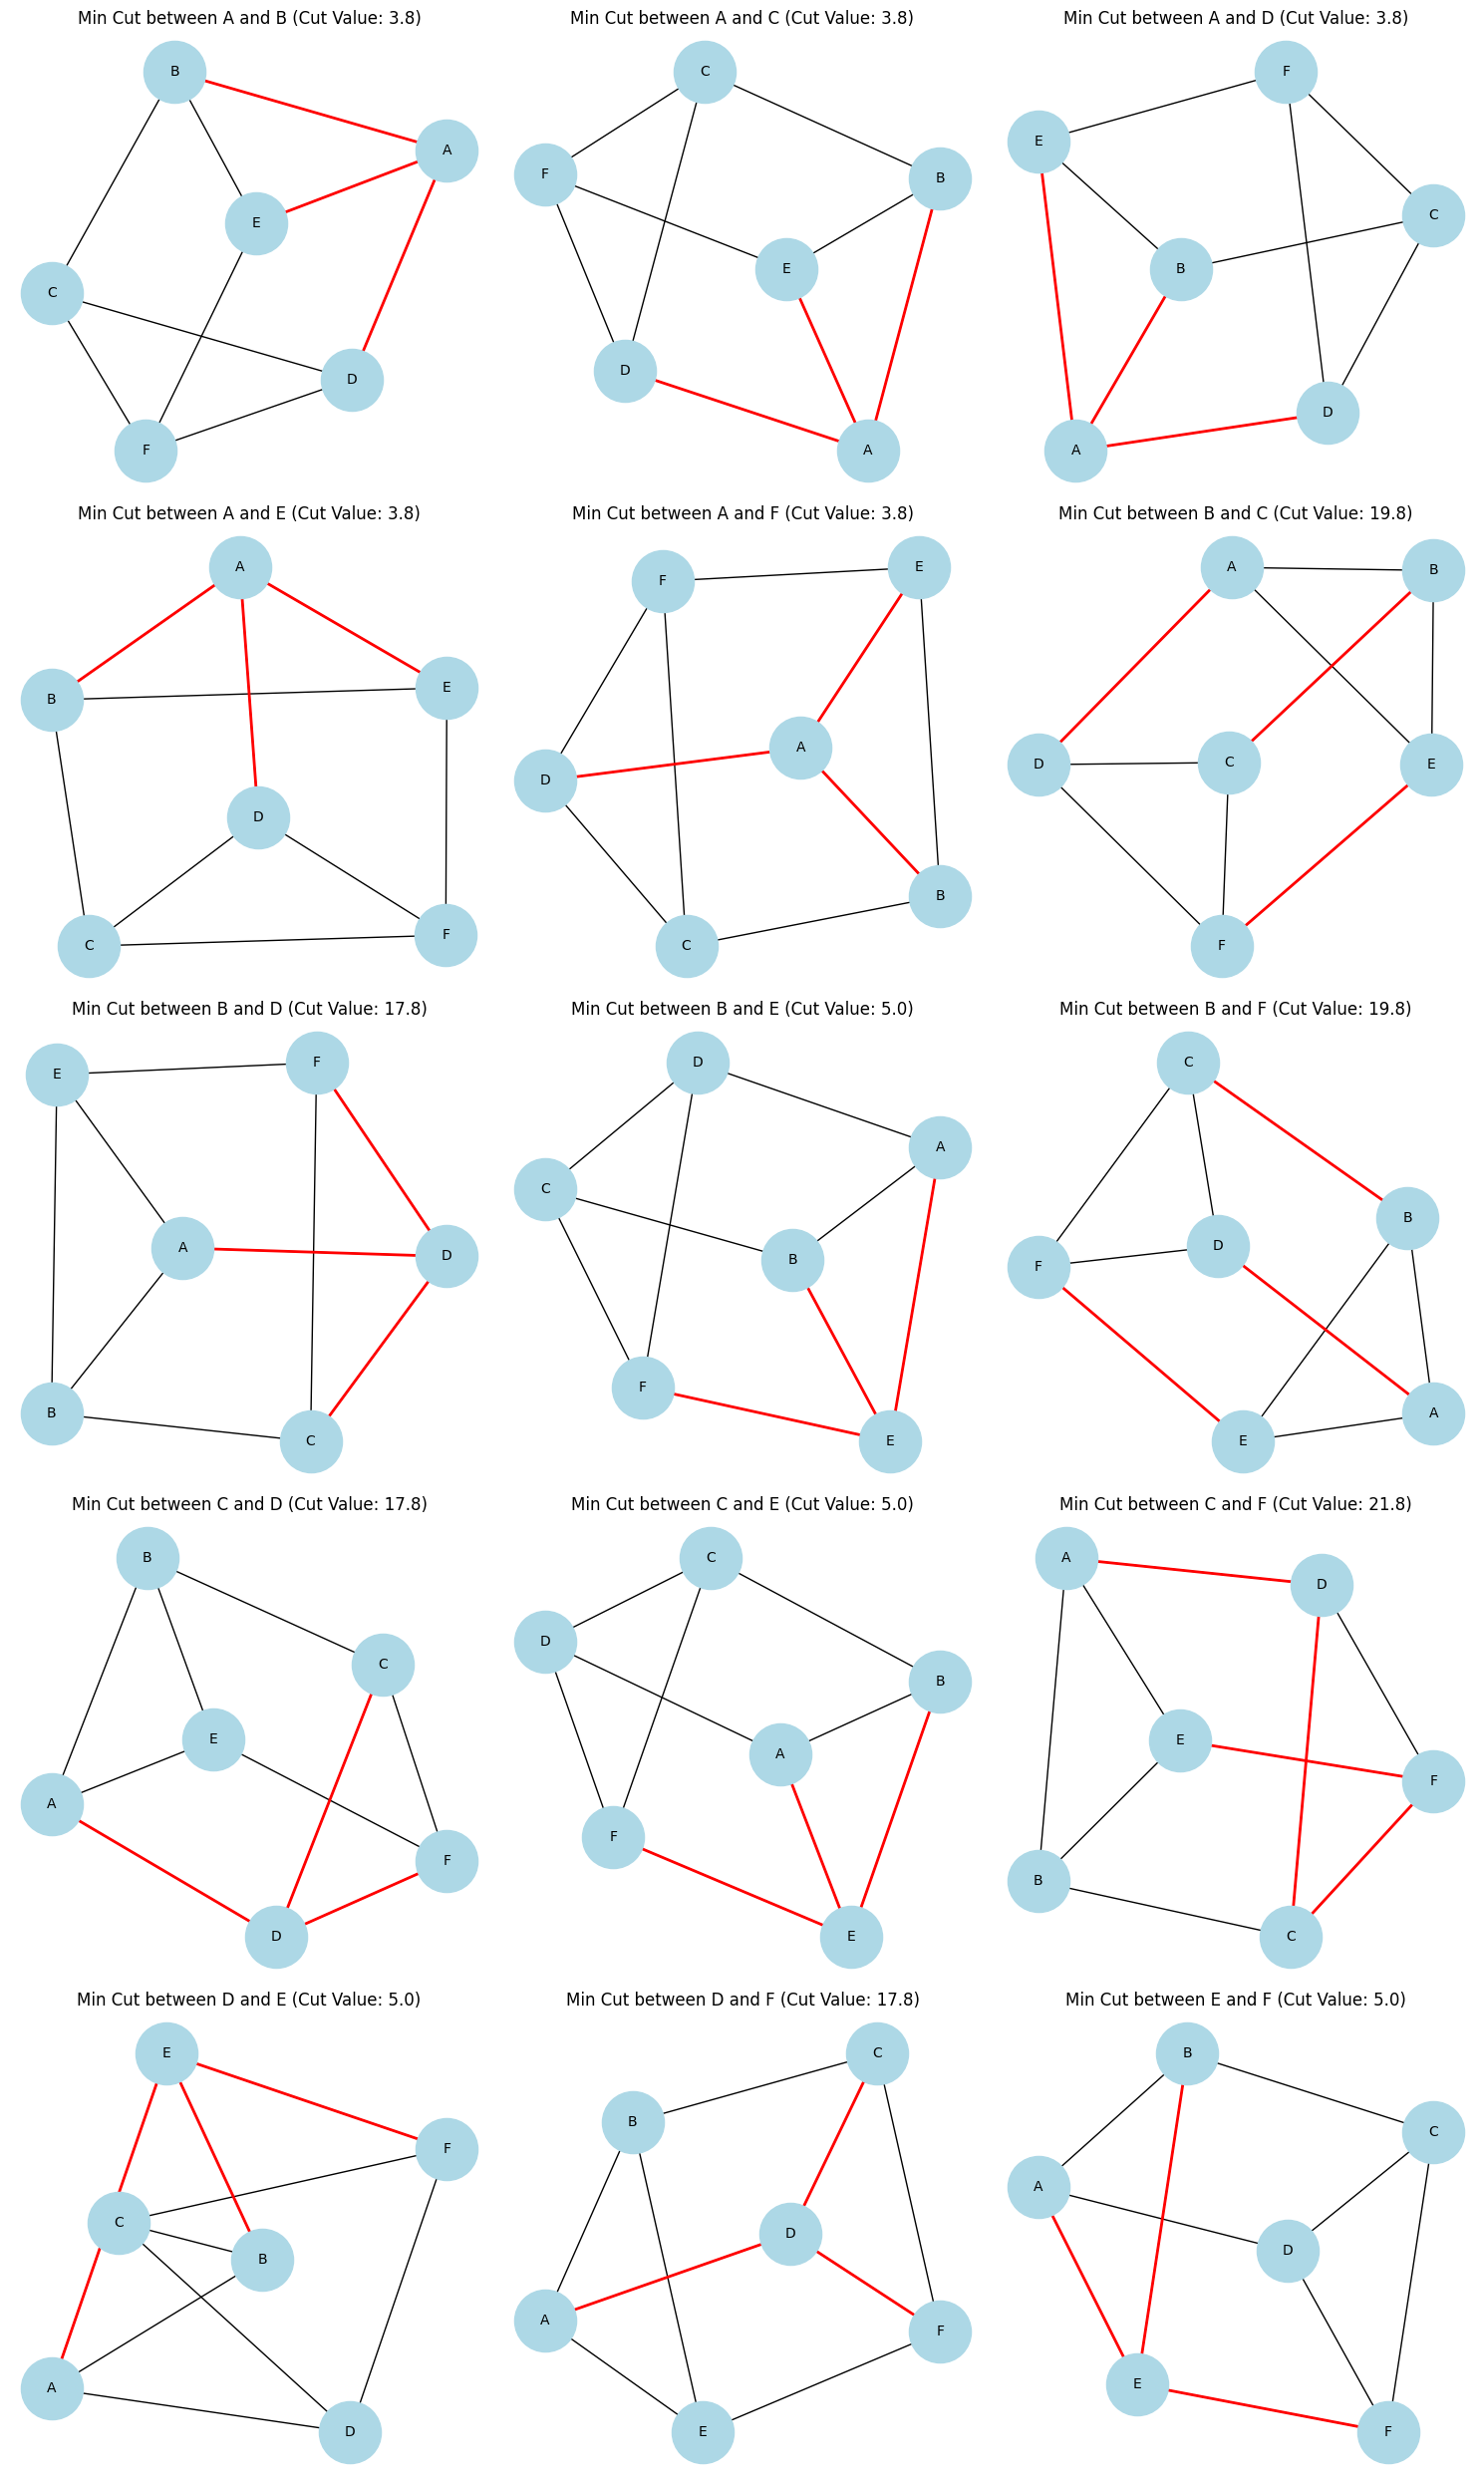

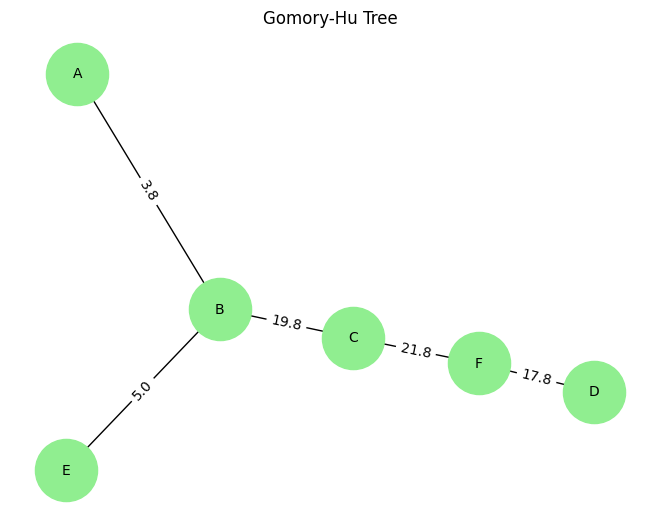

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges with weights
edges = {
    ('A', 'B'): 2, 
    ('B', 'C'): 19, 
    ('C', 'D'): 7, 
    ('D', 'A'): 0.8,
    ('A', 'E'): 1,
    ('B', 'E'): 4,
    ('C', 'F'): 14,
    ('D', 'F'): 10,
    ('E', 'F'): 0.01
}

# Create an undirected weighted graph
g = nx.Graph()
for (u, v), weight in edges.items():
    g.add_edge(u, v, capacity=weight)

# Compute the Gomory-Hu tree for the undirected graph

# Visualize the original graph
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(g, 'capacity')
edge_labels = {k: f"{v:.1f}" for k, v in edge_labels.items()}  # Format edge labels
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
plt.title("Original Graph")
plt.show()

# Visualize all min cuts in a grid of plots

# Get all pairs of nodes
node_pairs = [(u, v) for i, u in enumerate(g.nodes()) for v in list(g.nodes())[i+1:]]

# Set up the grid for plotting
num_pairs = len(node_pairs)
cols = 3
rows = (num_pairs // cols) + (num_pairs % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Iterate over each pair of nodes to compute and visualize the min cut
for idx, (source, target) in enumerate(node_pairs):
    cut_value, partition = nx.minimum_cut(g, source, target)
    reachable, non_reachable = partition
    cut_edges = [(u, v) for u in reachable for v in g[u] if v in non_reachable]
    
    # Visualize the min cut
    pos_cut = nx.spring_layout(g)
    nx.draw(g, pos_cut, ax=axes[idx], with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
    nx.draw_networkx_edges(g, pos_cut, ax=axes[idx], edgelist=cut_edges, edge_color='red', width=2)
    axes[idx].set_title(f"Min Cut between {source} and {target} (Cut Value: {cut_value:.1f})")

# Hide any unused subplots
for ax in axes[num_pairs:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Make Gomory Hu Tree
gomory_hu_tree = nx.gomory_hu_tree(g)
# Visualize the Gomory-Hu tree
pos_tree = nx.spring_layout(gomory_hu_tree)
nx.draw(gomory_hu_tree, pos_tree, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10)
edge_labels_tree = nx.get_edge_attributes(gomory_hu_tree, 'weight')
edge_labels_tree = {k: f"{v:.1f}" for k, v in edge_labels_tree.items()}  # Format edge labels
nx.draw_networkx_edge_labels(gomory_hu_tree, pos_tree, edge_labels=edge_labels_tree)
plt.title("Gomory-Hu Tree")
plt.show()

In [21]:
gomory_hu_tree.edges_subs

EdgeView([('A', 'B'), ('B', 'C'), ('B', 'E'), ('C', 'F'), ('D', 'F')])

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges with weights
edges = {
    ('A', 'B'): 2, 
    ('B', 'C'): 19, 
    ('C', 'D'): 7, 
    ('D', 'A'): 0.8,
    ('A', 'E'): 1,
    ('B', 'E'): 4,
    ('C', 'F'): 14,
    ('D', 'F'): 10,
    ('E', 'F'): 0.01
}

# Create an undirected weighted graph
g = nx.Graph()
for (u, v), weight in edges.items():
    g.add_edge(u, v, capacity=weight)


In [23]:
%%timeit
# Make Gomory Hu Tree
gomory_hu_tree = nx.gomory_hu_tree(g)

224 μs ± 21.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [57]:
# Create an array of all min cuts from the Gomory Hu tree sorted by capacity

node_pairs = [(u, v) for i, u in enumerate(g.nodes()) for v in list(g.nodes())[i+1:]]

def minimum_edge_weight_in_shortest_path(T, u, v):
    path = nx.shortest_path(T, u, v, weight="weight")
    return min((T[u][v]["weight"], (u, v)) for (u, v) in zip(path, path[1:]))

sorted_cuts = []
for pair in node_pairs:
    weight, min_edge = minimum_edge_weight_in_shortest_path(gomory_hu_tree, pair[0], pair[1])
    sorted_cuts.append((pair, min_edge, weight))

sorted_cuts = sorted(sorted_cuts, key=lambda x: x[2])

[(('A', 'B'), ('A', 'B'), 3.8),
 (('A', 'C'), ('A', 'B'), 3.8),
 (('A', 'D'), ('A', 'B'), 3.8),
 (('A', 'E'), ('A', 'B'), 3.8),
 (('A', 'F'), ('A', 'B'), 3.8),
 (('B', 'E'), ('B', 'E'), 5.01),
 (('C', 'E'), ('B', 'E'), 5.01),
 (('D', 'E'), ('B', 'E'), 5.01),
 (('E', 'F'), ('E', 'B'), 5.01),
 (('B', 'D'), ('F', 'D'), 17.8),
 (('C', 'D'), ('F', 'D'), 17.8),
 (('D', 'F'), ('D', 'F'), 17.8),
 (('B', 'C'), ('B', 'C'), 19.810000000000002),
 (('B', 'F'), ('B', 'C'), 19.810000000000002),
 (('C', 'F'), ('C', 'F'), 21.810000000000002)]

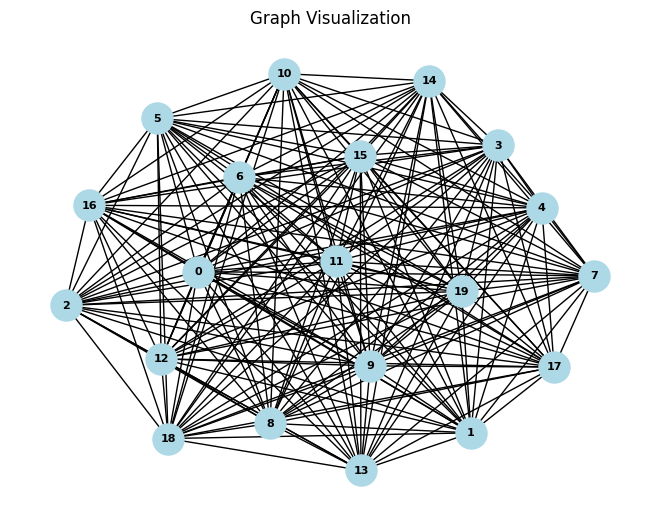

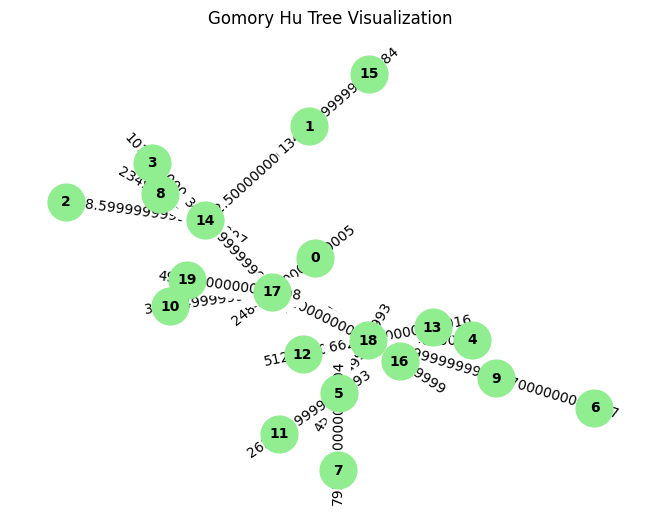

Computing size contraints...
[16, 2, 2]
sizes of connected components: [14, 2, 4]


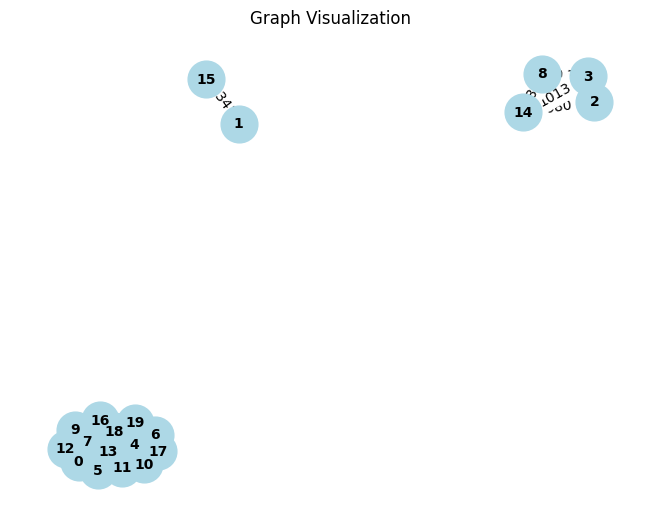

In [8]:
import math
from typing import Tuple

import networkx as nx
import matplotlib.pyplot as plt

import random

NUM_NODES = 20

# Create a fully connected graph with 30 nodes and random weights
g = nx.complete_graph(NUM_NODES)

# Assign random weights to each edge
for (u, v) in g.edges():
    g[u][v]['capacity'] = u * random.randint(0, 100) + v * random.randint(0, 100)  if random.randint(0,10) > 8 else 0.1

# Create an array of all min cuts from the Gomory Hu tree sorted by capacity

node_pairs = [(u, v) for i, u in enumerate(g.nodes()) for v in list(g.nodes())[i+1:]]

def minimum_edge_weight_in_shortest_path(T, u, v):
    path = nx.shortest_path(T, u, v, weight="weight")
    return min((T[u][v]["weight"], (u, v)) for (u, v) in zip(path, path[1:]))

nx.draw(g, with_labels=True, node_size=500, node_color="lightblue", font_size=8, font_weight="bold")
plt.title("Graph Visualization")
plt.show()

gomory_hu_tree = nx.gomory_hu_tree(g)

sorted_cuts = []
for pair in node_pairs:
    weight, min_edge = minimum_edge_weight_in_shortest_path(gomory_hu_tree, pair[0], pair[1])
    sorted_cuts.append((pair, min_edge, weight))

sorted_cuts = sorted(sorted_cuts, key=lambda x: x[2])

def get_cut_set_for_min_edge(min_edge: Tuple[str, str], G: nx.Graph, T: nx.Graph):

    T.remove_edge(*min_edge)

    cc = list(nx.connected_components(T))

    T.add_edge(*min_edge)

    cc = list(cc)
    if len(cc) != 2:
        print("connected components:", cc)
        raise ValueError("Expected 2 partitions")
    
    source = cc[0]
    target = cc[1]

    cut = []
    for edge in G.edges():
        if edge[0] in source and edge[1] in target or edge[0] in target and edge[1] in source:
            cut.append(edge)

    # Get all the edges that start in one partition and end in the other
    return cut, (source, target) 

g_final = g.copy() 

pos = nx.spring_layout(gomory_hu_tree)  # positions for all nodes
nx.draw(gomory_hu_tree, pos, with_labels=True, node_size=700, node_color="lightgreen", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(gomory_hu_tree, 'weight')
nx.draw_networkx_edge_labels(gomory_hu_tree, pos, edge_labels=edge_labels)
plt.title("Gomory Hu Tree Visualization")
plt.show()

k = 3
size_constraints = [0.8, 0.1, 0.1]
size_constraints_abs = []
total_nodes = NUM_NODES
print("Computing size contraints...")
for i, c in enumerate(size_constraints):
    if i == len(size_constraints) - 1: 
        size_constraints_abs.append(total_nodes)
        break
    size_constraints_abs.append(math.floor(NUM_NODES * c))
    total_nodes -= math.floor(NUM_NODES * c)

print(size_constraints_abs)

connected_components = []

for cut in sorted_cuts:
    connected_components = list(nx.connected_components(g_final))

    if len(connected_components) == k:
        print("sizes of connected components:", [len(c) for c in connected_components])
        break 

    cut_set, partition = get_cut_set_for_min_edge(cut[1], g, gomory_hu_tree)

    # print("0:",partition[0], "1:", partition[1])

    if all([len(partition[0]) < c for c in size_constraints_abs]) or all([len(partition[1]) < c for c in size_constraints_abs]): 
        continue

    # Remove cut set from g
    edges_deleted = 0
    for edge in cut_set: 
        try:
            g_final.remove_edge(*edge)
            edges_deleted += 1
        except Exception as e:
            continue
        
# Plot graph
pos = nx.spring_layout(g_final)  # positions for all nodes
nx.draw(g_final, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(g_final, 'capacity')
nx.draw_networkx_edge_labels(g_final, pos, edge_labels=edge_labels)
plt.title("Graph Visualization")
plt.show()